C:\Users\nader\AppData\Local\Temp\ipykernel_17940\710908966.py:5: DtypeWarning: Columns (2,4,7,8,10,11,12,13,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('smard1.csv', delimiter=';')
C:\Users\nader\AppData\Local\Temp\ipykernel_17940\710908966.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start date'] = pd.to_datetime(df['Start date'])



Data Analysis Summary:
Original date range: from 2015-01-01 00:00:00 to 2024-11-11 10:45:00
New date range: from 2018-10-01 00:00:00 to 2024-11-11 10:45:00

Columns removed(more than 85% of data missing):
- ∅ DE/LU neighbours [€/MWh] Calculated resolutions
- Poland [€/MWh] Calculated resolutions
- DE/AT/LU [€/MWh] Calculated resolutions

Total original entries: 345,836
Entries removed: 131,420
Percentage removed: 38.0%
Entries kept: 214,416


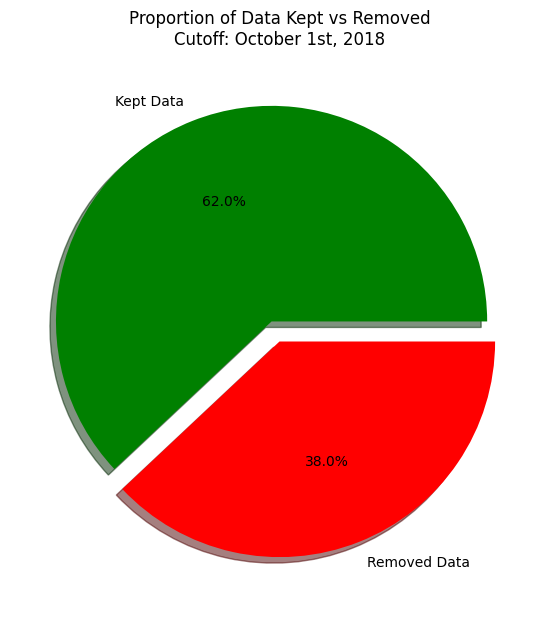

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('smard1.csv', delimiter=';')
df['Start date'] = pd.to_datetime(df['Start date'])

# Store original info
total_entries = len(df)
original_range = f"from {df['Start date'].min()} to {df['Start date'].max()}"

# Filter data by date
cutoff_date = pd.to_datetime('2018-10-01')
df_filtered = df[df['Start date'] >= cutoff_date]

# More than 85% of the data missing
columns_to_drop = [
    '∅ DE/LU neighbours [€/MWh] Calculated resolutions',
    'Poland [€/MWh] Calculated resolutions',
    'DE/AT/LU [€/MWh] Calculated resolutions'
]

df_filtered = df_filtered.drop(columns=columns_to_drop)

# Calculate statistics
removed_entries = total_entries - len(df_filtered)
removed_percentage = (removed_entries / total_entries) * 100

# Create visualization
plt.figure(figsize=(10, 7))

# Create pie chart
summary_data = pd.DataFrame({
    'Category': ['Kept Data', 'Removed Data'],
    'Entries': [len(df_filtered), removed_entries]
})

colors = ['green', 'red']
plt.pie(summary_data['Entries'], 
        labels=summary_data['Category'],
        autopct='%1.1f%%',
        colors=colors,
        explode=(0.1, 0),
        shadow=True)

plt.title('Proportion of Data Kept vs Removed\nCutoff: October 1st, 2018', pad=20)

# Print statistics
print("\nData Analysis Summary:")
print(f"Original date range: {original_range}")
print(f"New date range: from {df_filtered['Start date'].min()} to {df_filtered['Start date'].max()}")
print("\nColumns removed(more than 85% of data missing):")
for col in columns_to_drop:
    print(f"- {col}")
print(f"\nTotal original entries: {total_entries:,}")
print(f"Entries removed: {removed_entries:,}")
print(f"Percentage removed: {removed_percentage:.1f}%")
print(f"Entries kept: {len(df_filtered):,}")

# Save filtered data
df_filtered.to_csv('smard1_filtered.csv', sep=';', index=False)

plt.show()